In this notebook I will demonstrate that ridge regression is easy to understand algorithmically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
n_samp = 11
n_feat = 10
n_comp = 3
n_y = 1
components = np.random.randn(n_samp, n_comp)
# mapping from components to features
weights_features = np.random.randn(n_comp, n_feat)
# the features are a linear combination of lower-dimensional components
features = components @ weights_features
# the data is a (different) linear combination of the components, with noise on top
weights_y = np.random.randn(n_comp, n_y)
noise_train = np.random.randn(n_samp, n_y) * 3
noise_test = np.random.randn(n_samp, n_y) * 3
y_train = components @ weights_y + noise_train
y_test = components @ weights_y + noise_test

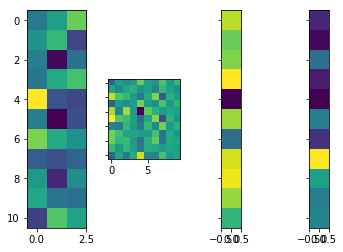

In [53]:
# so the data and design are
fig, ax = plt.subplots(1, 4, sharey=True)
ax[0].imshow(components)
ax[1].imshow(features)
ax[2].imshow(y_train)
ax[3].imshow(y_test)

In [54]:
# let's play with different ways of understanding this data.
# for convenience, let's define some functions to deal with
# the basic GLM maths
def r2(x, y, y_test):
    b_hat = np.linalg.lstsq(x, y, rcond=None)[0]
    y_hat = x @ b_hat
    # correlate prediction with *out-of-sample* data
    return corrpairs(y_hat, y_test)

def unit_length(x):
    return x / np.sqrt(np.sum(x ** 2, axis=0))

# TODO - move this to sana
def corrpairs(x, y):
    return np.multiply(*[unit_length(thisvar-thisvar.mean(axis=0)) for thisvar in (x, y)]).sum(axis=0)

# ta da
print(corrpairs(components, y))
print(np.corrcoef(np.hstack((components,y)).T)[-1,:-1])

[-0.45929706 -0.37661438 -0.03730796]
[-0.45929706 -0.37661438 -0.03730796]


In [55]:
# we can do rather well if we know the components
r2(components, y_train, y_train)

array([0.81342643])

In [56]:
# out of sample
r2(components, y_train, y_test)

array([0.57079701])

In [57]:
# and equally well with the features (in sample!)
r2(features, y_train, y_train)

array([0.81342643])

In [58]:
r2(features, y_train, y_test)

array([0.57079701])

In [ ]:
# I suspect this demo does not work. Because the features are just linear combinations 
# of the components, so I think the OLS prediction ends up being *the same*. Huh. Indeed.
# Did I make a mistake somewhere? Reveals the limitations of my understanding of ridge I
# think.